In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import requests
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModel, VisionEncoderDecoderModel, AutoFeatureExtractor, AutoImageProcessor
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from torchvision.transforms.functional import crop
import cv2

In [9]:
import os
import requests

weights_path = 'weights/best14.pt'
if not os.path.isfile(weights_path):
    url = 'https://raw.githubusercontent.com/Mexbow/yolov5_model/master/weights/best14.pt'
    
    print(f"Downloading weights from {url}...")
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for bad responses
    
    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(weights_path), exist_ok=True)  
    # Save the weights file locally
    with open(weights_path, 'wb') as f:
        f.write(response.content)
    print("Weights downloaded successfully.")
else:
    print("Weights already exist.")


Weights downloaded successfully.


In [12]:
import torch

try:
    object_detection_model = torch.hub.load('Mexbow/yolov5_model', 'custom', path=weights_path, autoshape=True)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Failed to load the YOLOv5 model: {e}")


Using cache found in /root/.cache/torch/hub/Mexbow_yolov5_model_master
YOLOv5 🚀 2024-10-4 Python-3.10.14 torch-2.4.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Model loaded successfully.


In [ ]:
# # Perform object detection
# with torch.no_grad():
#     outputs = model(**inputs)

# # Process output predictions
# target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
# results = model.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

# # Get bounding boxes, labels, and scores
# boxes = results["boxes"]  # Coordinates of bounding boxes
# labels = results["labels"]  # Object labels
# scores = results["scores"]  # Confidence scores

# # Draw the bounding boxes on the image
# def draw_boxes(image, boxes, labels):
#     # Convert PIL image to RGB if needed
#     if image.mode != "RGB":
#         image = image.convert("RGB")
        
#     draw = ImageDraw.Draw(image)
    
#     # Load font if available, else use default
#     try:
#         font = ImageFont.truetype("arial.ttf", 20)
#     except IOError:
#         font = ImageFont.load_default()
    
#     for i, box in enumerate(boxes):
#         # Extract coordinates from the box
#         box = [int(x) for x in box]
#         draw.rectangle(box, outline="red", width=3)
        
#         # Get label name from label index (optional)
#         label = f"Object {labels[i].item()}"  # Use your own label mapping if available
        
#         # Draw label and score
#         draw.text((box[0], box[1]), label, fill="red", font=font)
    
#     return image

# # Draw the bounding boxes on the image
# image_with_boxes = draw_boxes(image.copy(), boxes, labels)

# # Display the image with bounding boxes
# plt.figure(figsize=(8, 8))
# plt.imshow(image_with_boxes)
# plt.axis("off")  # Hide axes
# plt.show()

/root/.cache/torch/hub/Mexbow_yolov5_model_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 768x1366 2 persons, 6 bottles, 1 cup, 2 bowls, 2 chairs, 1 dining table, 1 microwave, 2 ovens, 1 refrigerator
Speed: 26.8ms pre-process, 203.9ms inference, 21.7ms NMS per image at shape (1, 3, 384, 640)


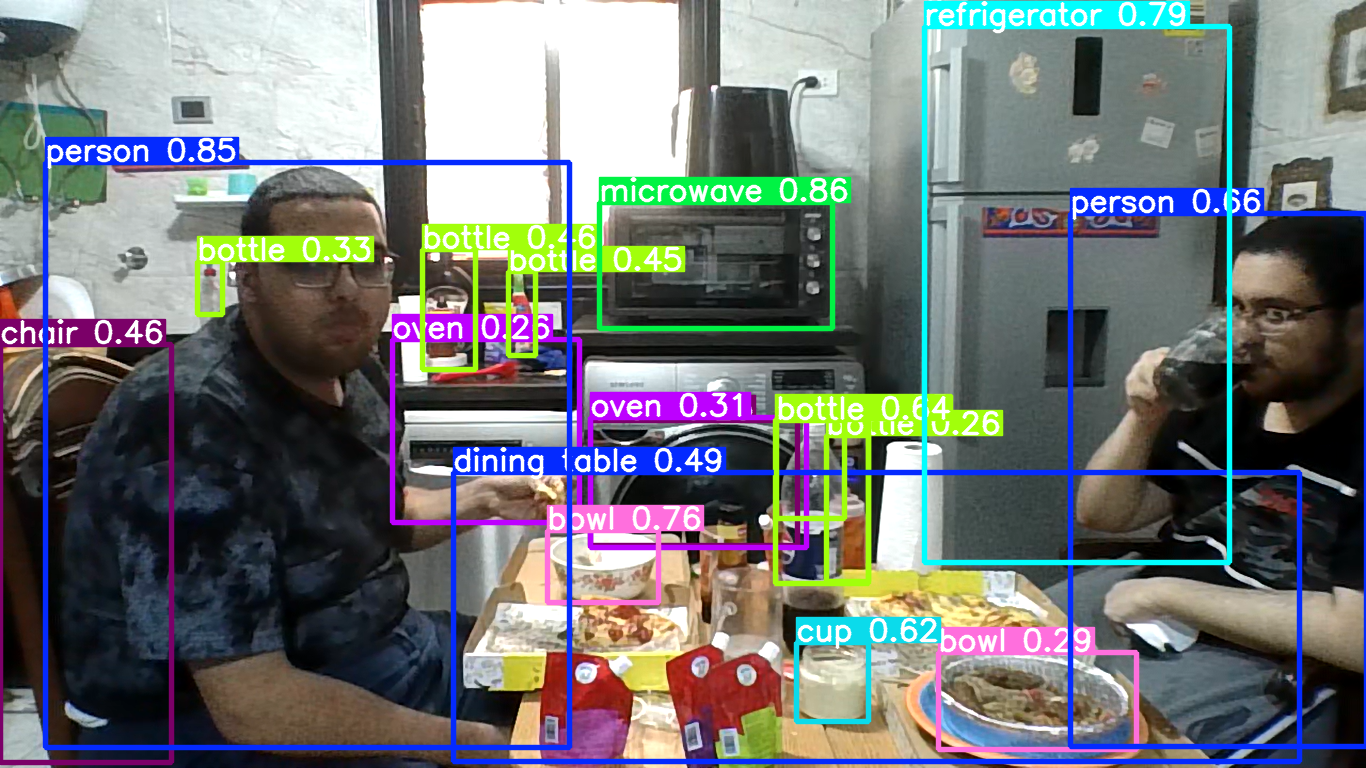

Object 1:
 - Bounding Box: [      599.5      202.83      832.09      328.56]
 - Label: microwave
 - Confidence Score: 0.86
Object 2:
 - Bounding Box: [     45.199      162.77      569.27      747.07]
 - Label: person
 - Confidence Score: 0.85
Object 3:
 - Bounding Box: [     924.68      26.324      1229.8       562.6]
 - Label: refrigerator
 - Confidence Score: 0.79
Object 4:
 - Bounding Box: [     547.33      530.77      658.36      602.02]
 - Label: bowl
 - Confidence Score: 0.76
Object 5:
 - Bounding Box: [     1070.6      213.72        1366      746.41]
 - Label: person
 - Confidence Score: 0.66
Object 6:
 - Bounding Box: [     776.71      420.35      844.03       518.2]
 - Label: bottle
 - Confidence Score: 0.64
Object 7:
 - Bounding Box: [     796.76       642.5      868.51      721.27]
 - Label: cup
 - Confidence Score: 0.62
Object 8:
 - Bounding Box: [     453.21      472.16      1299.4      761.16]
 - Label: dining table
 - Confidence Score: 0.49
Object 9:
 - Bounding Box: [  

In [11]:
# Load the image
img = Image.open("/kaggle/input/theboiz/theboiz1.png").convert('RGB')

results = object_detection_model(img)

# Parse results
results.print()  # prints the results
results.show()   # display image with detections (bounding boxes)

# Alternatively, use OpenCV to display image with bounding boxes
img_with_boxes = results.render()[0]  # render() returns a list, get the first image
# Extract bounding boxes, labels, and scores
# Bounding boxes in format (x1, y1, x2, y2), confidence score, and class id
boxes = results.xyxy[0][:, :4].cpu().numpy()  # Bounding boxes (x1, y1, x2, y2)
scores = results.xyxy[0][:, 4].cpu().numpy()  # Confidence scores
class_ids = results.xyxy[0][:, 5].cpu().numpy().astype(int)  # Class IDs (as integers)

# Get labels using class IDs
labels = [results.names[i] for i in class_ids]  # Convert class IDs to class names

# Display the results
for i, (box, score, label) in enumerate(zip(boxes, scores, labels)):
    print(f"Object {i + 1}:")
    print(f" - Bounding Box: {box}")
    print(f" - Label: {label}")
    print(f" - Confidence Score: {score:.2f}")

In [5]:
captioning_processor = AutoImageProcessor.from_pretrained("motheecreator/ViT-GPT2-Image-Captioning")
tokenizer = AutoTokenizer.from_pretrained("motheecreator/ViT-GPT2-Image-Captioning")
model = VisionEncoderDecoderModel.from_pretrained("motheecreator/ViT-GPT2-Image-Captioning")

preprocessor_config.json:   0%|          | 0.00/329 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/470 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.93k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/957M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/89.0 [00:00<?, ?B/s]

In [6]:
# Step 1: Caption the original image
original_inputs = captioning_processor(images=img, return_tensors="pt")
with torch.no_grad():
    original_caption_ids = model.generate(**original_inputs)
original_caption = tokenizer.decode(original_caption_ids[0], skip_special_tokens=True)

def crop_objects(image, boxes):
    cropped_images = []
    for box in boxes:
        cropped_image = crop(image, int(box[1]), int(box[0]), int(box[3] - box[1]), int(box[2] - box[0]))
        cropped_images.append(cropped_image)
    return cropped_images

cropped_images = crop_objects(img, boxes)

# Step 3: Caption each cropped image
captions = []
for cropped_image in cropped_images:
    # Preprocess and generate captions for each cropped image
    inputs = captioning_processor(images=cropped_image, return_tensors="pt")
    with torch.no_grad():
        caption_ids = model.generate(**inputs)
    caption = tokenizer.decode(caption_ids[0], skip_special_tokens=True)
    captions.append(caption)

# Display object-specific captions
for label, caption in zip(labels, captions):
    print(f"Object: {label}, Caption: {caption}")
print("Generated Caption for the whole image: ", original_caption)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask

Object: microwave, Caption: A microwave oven sitting in a kitchen.           
Object: person, Caption: A man in a kitchen with a box of doughnuts.       
Object: refrigerator, Caption: A man is sitting in a kitchen with a cup of coffee.      
Object: bowl, Caption: A cup of coffee and a bowl of ice cream.        
Object: person, Caption: A man drinking a beer while sitting next to a man drinking wine.     
Object: bottle, Caption: A glass of water with a bottle of wine in it.       
Object: cup, Caption: A glass of water with a spoon in it.         
Object: dining table, Caption: A table with a plate of food and a glass of wine.      
Object: chair, Caption: A person sitting on a couch with a pair of shoes.       
Object: bottle, Caption: A glass of milk sitting on top of a train.        
Object: bottle, Caption: A picture of a person with a skateboard.         
Object: bottle, Caption: A bottle of water and a bottle of soda.         
Object: bottle, Caption: A red and white fire hydra

In [2]:
!pip install azureml-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 48.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.4/901.4 kB 28.4 MB/s

In [5]:
import zipfile
import os
import json
import torch
from azureml.core.model import Model
from transformers import AutoImageProcessor, AutoTokenizer, VisionEncoderDecoderModel

def init():
    global object_detection_model, captioning_model, captioning_processor, tokenizer

    # Load YOLOv5 model weights from the registered model
    model_path = Model.get_model_path('yolov5_weights')
    
    # Extract the YOLOv5 model weights
    extract_path = './yolov5_model'
    with zipfile.ZipFile(model_path, 'r') as zip_ref:
        os.makedirs(extract_path, exist_ok=True)
        zip_ref.extractall(extract_path)

    # Load the YOLOv5 model
    object_detection_model = torch.hub.load('ultralytics/yolov5', 'custom', path=os.path.join(extract_path, 'weights/best14.pt'), force_reload=True)

    # Load the captioning model
    captioning_processor = AutoImageProcessor.from_pretrained("motheecreator/ViT-GPT2-Image-Captioning")
    tokenizer = AutoTokenizer.from_pretrained("motheecreator/ViT-GPT2-Image-Captioning")
    captioning_model = VisionEncoderDecoderModel.from_pretrained("motheecreator/ViT-GPT2-Image-Captioning")

def run(data):
    # Parse the incoming request
    input_data = json.loads(data)
    img_path = input_data['img_path']

    # Load the image
    img = Image.open(img_path).convert('RGB')

    # Perform object detection
    results = object_detection_model(img)
    
    # Process results and extract bounding boxes
    boxes = results.xyxy[0][:, :4].cpu().numpy()
    scores = results.xyxy[0][:, 4].cpu().numpy()
    class_ids = results.xyxy[0][:, 5].cpu().numpy().astype(int)
    labels = [results.names[i] for i in class_ids]

    # Crop objects and generate captions
    captions = []
    for box in boxes:
        cropped_image = img.crop((int(box[0]), int(box[1]), int(box[2]), int(box[3])))
        inputs = captioning_processor(images=cropped_image, return_tensors="pt")
        
        with torch.no_grad():
            caption_ids = captioning_model.generate(**inputs)
        
        caption = tokenizer.decode(caption_ids[0], skip_special_tokens=True)
        captions.append(caption)

    return {"labels": labels, "captions": captions}
